### Linear Regression as building block for Supervised Learning

We're going to start the Supervised Learning session with Linear Regression (using scikit-learn).

Refresh your knowledge of linear regession methods.

1) Notes from Econometrics courses taken here at CEU (Econometrics 1 and 2)

2) Check out the wikipedia page and also check out Andrew Ng's  lectures for free on youtube

3) Read chapter 3 in the ISLR Book



<img src="../slides/Figures/linear-regression.png">

Example that can be found in thee ISLR book. "For the Advertising data, the least squares fit for the regression
of sales onto TV is shown. The fit is found by minimizing the sum of squared
errors. Each grey line segment represents an error, and the fit makes a compromise by averaging their squares. In this case a linear fit captures the essence of
the relationship, although it is somewhat deficient in the left of the plot."

### Step 1: Load the data

We'll be analyzing a data set consisting of house prices in Boston in the 1970s (as Mueller-Guido book/many and many oher ML tutorials with Python). The data are available in the sklearn library and we are going to load them and do some basic analysis and visualization.

In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
# Load the housing dataset
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
boston_data = pd.DataFrame(boston.data, columns = boston.feature_names)

In [6]:
boston_data['Price'] = boston.target

In [7]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Step 2: Visualizing current data

In [8]:
#Let's plot using the pandas built in visualization tools
boston_data.Price.hist(bins=100)

Text(0, 0.5, 'Number of houses for each price bin')

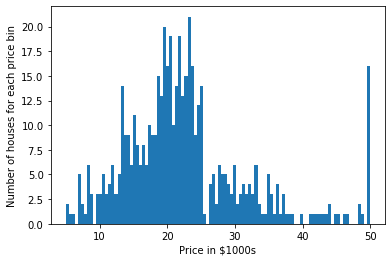

In [9]:
#Alternatively we can do this with Matplotlib
import matplotlib.pyplot as plt
plt.hist(boston_data['Price'], bins=100)
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses for each price bin')
#plt.savefig('Outputs/Histogram_Price.png')

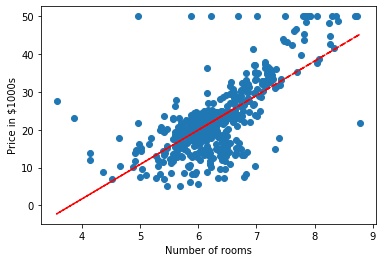

In [10]:
import numpy as np
# Correlations between number of rooms and prices
plt.scatter(boston_data['RM'], boston_data['Price'])
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')
#plt.savefig('Outputs/Corr_Price_Rooms.png')
z = np.polyfit(boston_data['RM'], boston_data['Price'], 1)
p = np.poly1d(z)
plt.plot(boston_data['RM'],p(boston_data['RM']),"r--")
plt.show()

### Challenge: Describe the type of relationship you observe in the plot above.

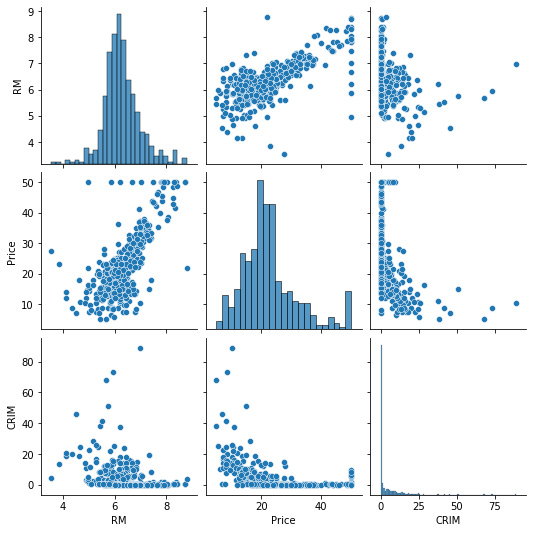

In [11]:
import seaborn as sns
sns.pairplot(boston_data[['RM', 'Price', 'CRIM']])

In [12]:
boston_data[['RM', 'Price', 'CRIM']].describe()

,RM,Price,CRIM
count,506.000000,506.000000,506.000000
mean,6.284634,22.532806,3.613524
std,0.702617,9.197104,8.601545
min,3.561000,5.000000,0.006320
25%,5.885500,17.025000,0.082045
50%,6.208500,21.200000,0.256510
75%,6.623500,25.000000,3.677083
max,8.780000,50.000000,88.976200


### Challenge: Use pairplot method to plot three variables (features) of your own choice.

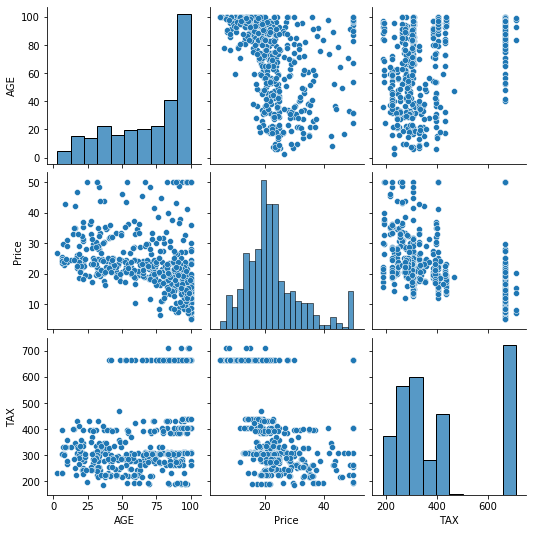

In [13]:
sns.pairplot(boston_data[['AGE', 'Price', 'TAX']])

In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept =True)

We are going to perform out of sample validation. The training set is implemented to build up the model that best predicts the outcome. The validation set is used to validate the model(s). Observations in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.

Scikit helps us with `train_test_split`.

The parameters passed are your features and outcome. We can also specify the fraction of observations we leave out as a test set. Remind to set the seed, using `random_state` to replicate your own results. 

<img src="../slides/Figures/train-test-split.png">

<img src="../slides/Figures/overfitting.png">

In [15]:
# Data Columns
X = boston_data.drop('Price',1)

# Targets
y = boston_data.Price

In [16]:
X.shape

(506, 13)

In [17]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [18]:
y.shape

(506,)

In [19]:
from sklearn.model_selection import train_test_split
# Here I set the test size to 0.3 instead of 0.2 and the random_state to 2020
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=2020)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [21]:
# Implement Linear Regression
reg.fit(X_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Get the intercept
reg.intercept_

51.147286148631494

In [23]:
#Get the coefficients
reg.coef_

array([-9.26308943e-02,  5.73400412e-02,  6.18333552e-02,  1.52679183e+00,
       -2.51998739e+01,  2.71909700e+00,  2.88616866e-02, -1.68595686e+00,
        3.54272267e-01, -1.67352824e-02, -1.14208394e+00,  8.12844183e-03,
       -5.68079655e-01])

In [24]:
#Get coefficients and set them to a dataframe
estimated_coeff = pd.DataFrame(reg.coef_, X.columns, columns=['Features'])

In [25]:
estimated_coeff

,Features
CRIM,-0.092631
ZN,0.057340
INDUS,0.061833
CHAS,1.526792
NOX,-25.199874
RM,2.719097
AGE,0.028862
DIS,-1.685957
RAD,0.354272
TAX,-0.016735


We want to check correctedness of our model using the testing data. We do so by using the predict method.

In [26]:
yhat_train = reg.predict(X_train)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

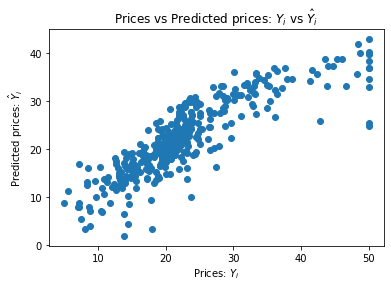

In [27]:
#Plot true outcomes (target) and predicted values from our model

plt.scatter(y_train, yhat_train)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### Residual Plot

Let's check the residual plot to see if we are doing a good job. If we are doing a decent job, we don't expect the residual plot to display patters. If we, instead, observe some patterns i.e residuals are larger for higher prices we have heteroskedasticity in the data and we have to take care of this. If dealing with prices think about log-transformation of the data. Prices are usually log-normally distributed with longer right tail.

In [28]:
residuals_train = y_train - yhat_train

Text(0.5, 1.0, 'Residuals training set')

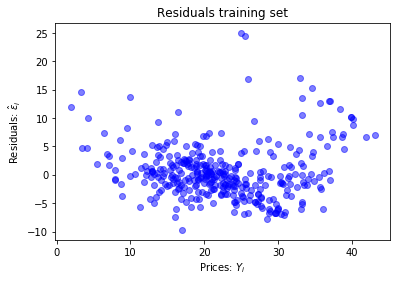

In [29]:
plt.scatter(yhat_train, residuals_train, c='b',alpha=0.5)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Residuals: $\hat{\epsilon}_i$")
plt.title("Residuals training set")

### Challenge: Plot the residuals for the test set against y_test as above. What other type of plot can we use?

### Model evaluation

We want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed
using two related quantities: the root mean squared error (RMSE) and the R2 statistic. Sklearn helps us again.

In [30]:
#R2
print ("Training set score: {:.2f}".format(reg.score (X_train , y_train ))) 
print ( "Test set score: {:.2f}".format(reg.score( X_test , y_test ))) 

Training set score: 0.73
Test set score: 0.72


*Quiz - Problem 1:*  The regression performs better in the training sample as the larger $R^2$ shows which is a bit larger than in the test sample. This difference is not big (only 0.01) so in general we are doing similarly well in the test sample as in the training sample.

In [31]:
#MSE
from sklearn.metrics import mean_squared_error
#predict for the test sample too
yhat_test = reg.predict(X_test)
mse_train = mean_squared_error(y_train, yhat_train)
mse_test = mean_squared_error(y_test, yhat_test)
print(f"The MSE of the train sample is: {mse_train}")
print(f"The MSE of the test sample is: {mse_test}")

The MSE of the train sample is: 23.457530770256938
The MSE of the test sample is: 21.5287302607676


*Quiz - Problem 1:* The MSE of the test sample is a bit lower, so better than in the train sample, it means that our model does a a bit better out of sample, because it has a smaller mean squared error. The difference is not big, so maybe in a bigger sample we would observe a smaller difference.

### Challenge: What is the R2 saying? Do you think the RMSE will provide a different answer than the R2? Use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html"> MSE from Sklearn</a> to aswer this question.

**Quiz - Problem 2**

In [32]:
# Data Columns
X = boston_data.RM # average number of rooms per dwelling

# Targets
y = boston_data.Price

In [33]:
# Here I use the same specification as in Problem 1
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=2020)

In [34]:
import numpy as np

X_test,X_train = np.array(X_test), np.array(X_train)
X_test,X_train = X_test.reshape(-1,1), X_train.reshape(-1,1)

reg.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
reg.intercept_

-30.775315113381303

In [36]:
reg.coef_

array([8.32136817])

In [37]:
#R2
print ("Training set score: {:.2f}".format(reg.score(X_train , y_train ))) 
print ( "Test set score: {:.2f}".format(reg.score( X_test , y_test ))) 

Training set score: 0.50
Test set score: 0.37


In [38]:
#MSE
yhat_train = reg.predict(X_train)
yhat_test = reg.predict(X_test)
mse_train = mean_squared_error(y_train, yhat_train)
mse_test = mean_squared_error(y_test, yhat_test)
print(f"The MSE of the train sample is: {mse_train}")
print(f"The MSE of the test sample is: {mse_test}")

The MSE of the train sample is: 43.14801432486695
The MSE of the test sample is: 49.05929873840675


*Quiz - Problem 2:* Here I see that the $R^2$ of the training sample is larger than in the test sample. The difference is large, so this model does quite badly out of sample. The magnitudes of the MSE's paint the same picture, namely, the out of sample MSE is larger than the train test's MSE. This basically implies that with this specification our regression does quite poorly in predicting values, so we should include more variables to control for this. 

The first model with more variables does much better. The $R^2$ are higher and the MSE's are lower of that model. This model does quite poorly according to these measures, so I would choose the other one to predict the house prices.

### References
https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

https://towardsdatascience.com/heteroscedasticity-is-nothing-to-be-afraid-of-730dd3f7ca1f

https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb